In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [61]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold
from sklearn.linear_model import LogisticRegression

In [62]:
train=pd.read_csv("train.csv")
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [64]:
print("training data shape:",train.shape)
print("testing data shape",test.shape)

training data shape: (891, 12)
testing data shape (418, 11)


In [65]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Detect missing values numerically

In [66]:
def missing_values_table(df):
    mis_val=df.isnull().sum()
    mis_val_percent=100*df.isnull().sum()/len(df)
    mis_val_table=pd.concat([mis_val,mis_val_percent],axis=1)
    mis_val_table_ren_columns=mis_val_table.rename(columns={0:'missing value',1:'% of Total'})
    mis_val_table_ren_columns=mis_val_table_ren_cloumns[mis_val_table_ren_column.iloc[:,1]z
                                                       
                                                       
                                                       0]
    print("your selected dataframe:has"+str(df.shape[1])+"columns.\n " "there are"+str(mis_val_table_ren_columns))
    mis_val_table_ren_cloumns

In [67]:
train_missing=missing_values_table(train)
train_missing

NameError: name 'mis_val_table_ren_cloumns' is not defined

In [68]:
pip install  missingno

Note: you may need to restart the kernel to use updated packages.


<AxesSubplot: >

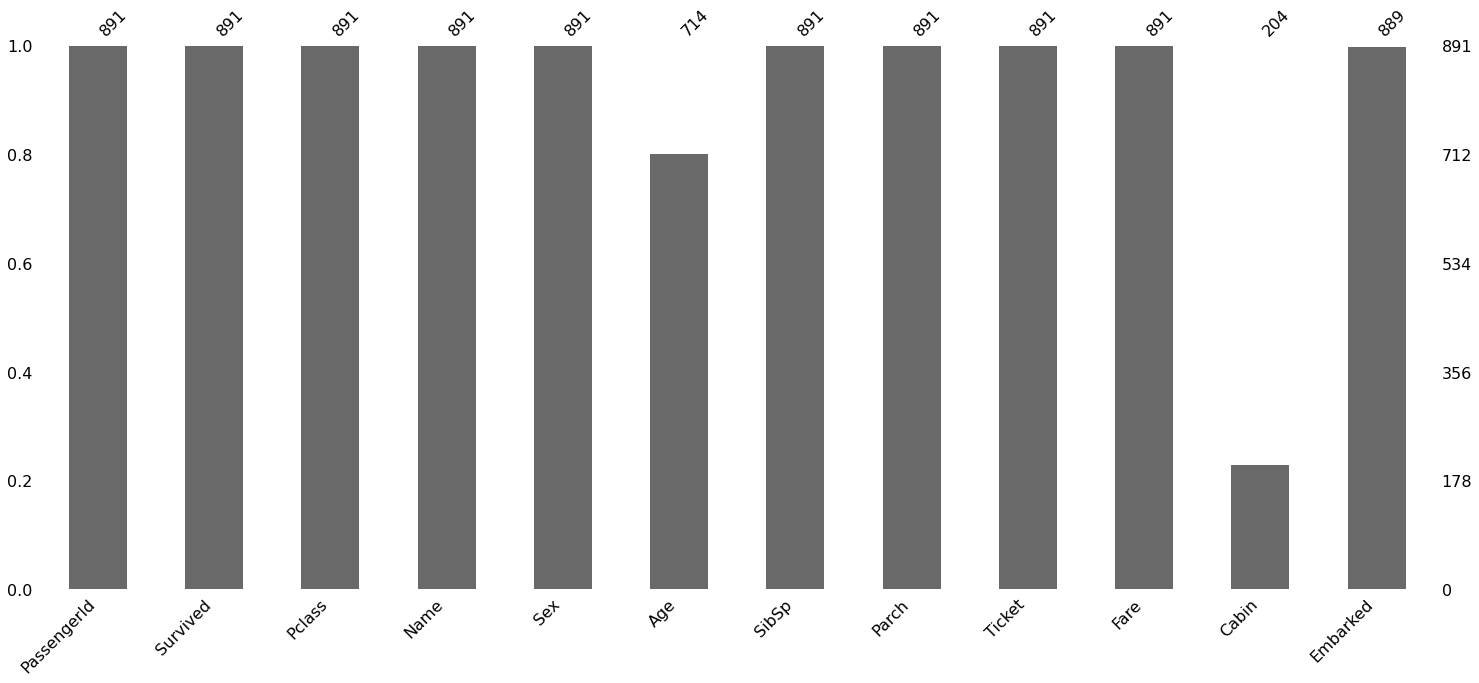

In [69]:
import missingno as msno
msno.bar(train)

<AxesSubplot: >

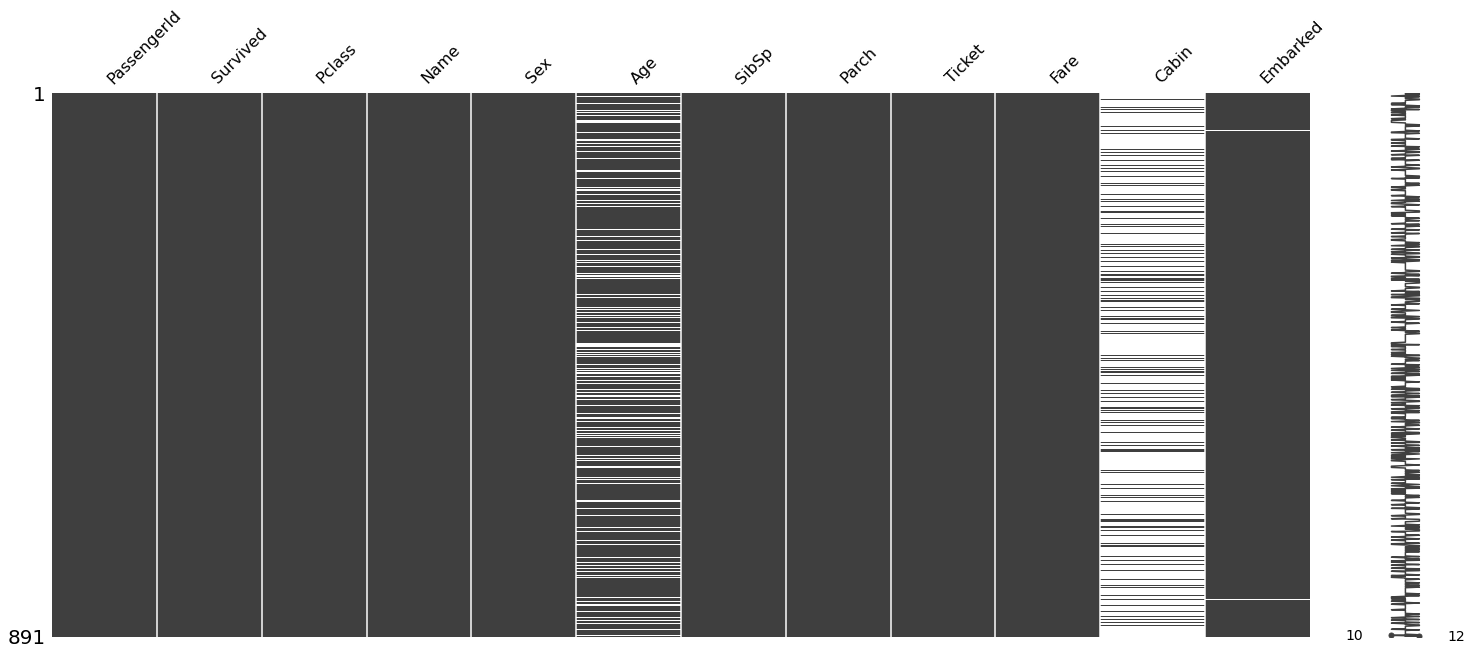

In [70]:
msno.matrix(train)

<AxesSubplot: >

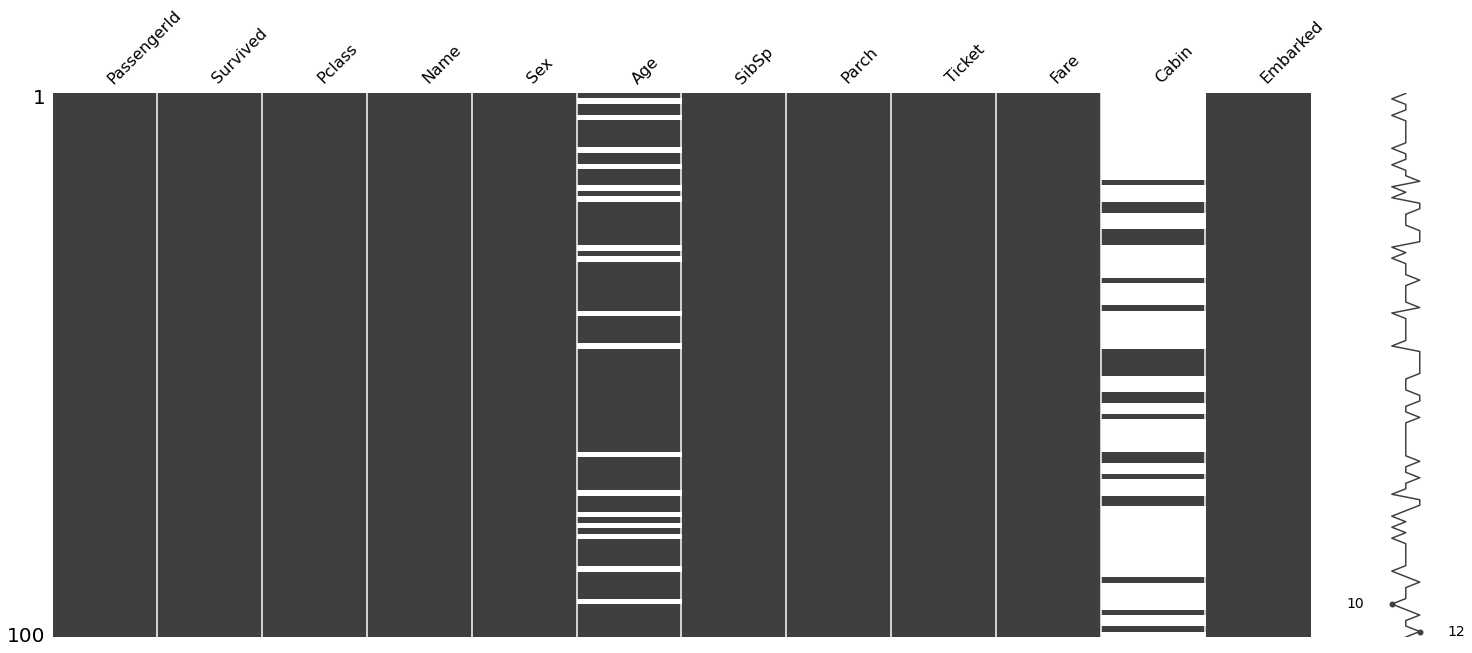

In [71]:
msno.matrix(train.sample(100))

# Find reasons for missing values using matrix plot,heap map and dendrogram

<AxesSubplot: >

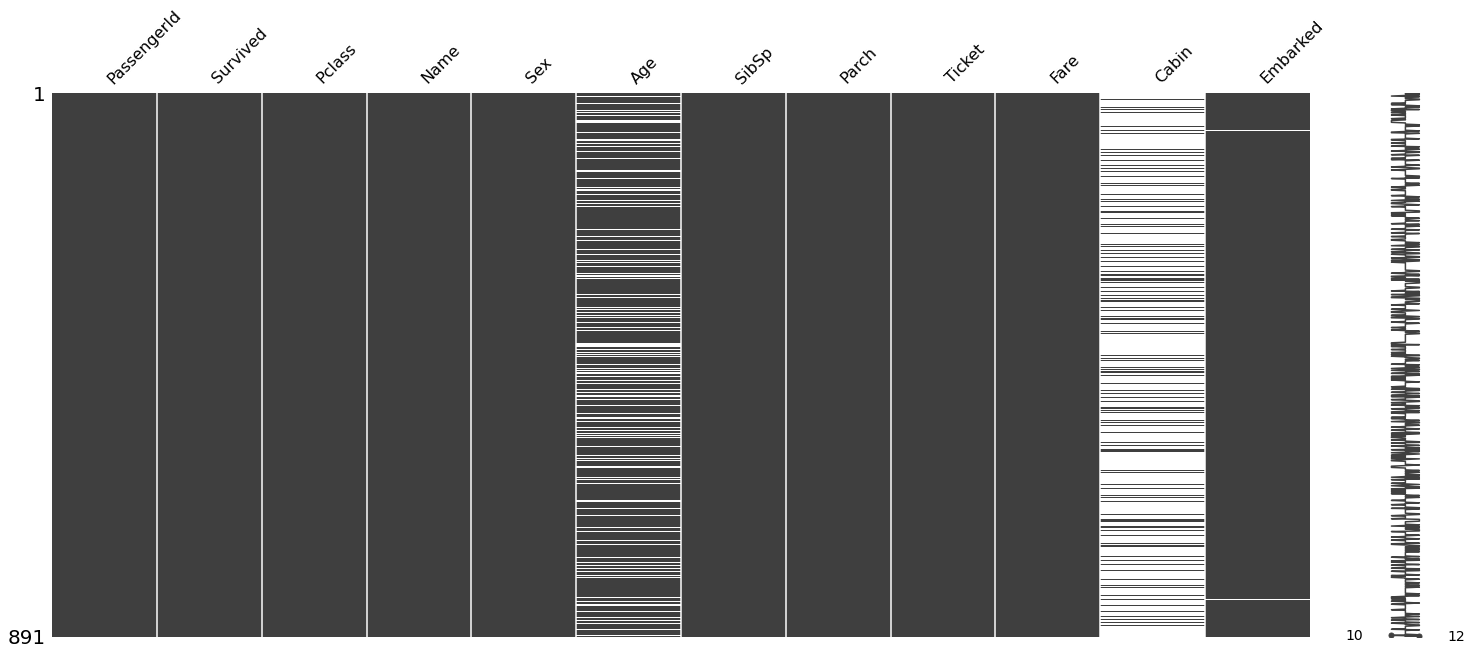

In [72]:
msno.matrix(train)

<AxesSubplot: >

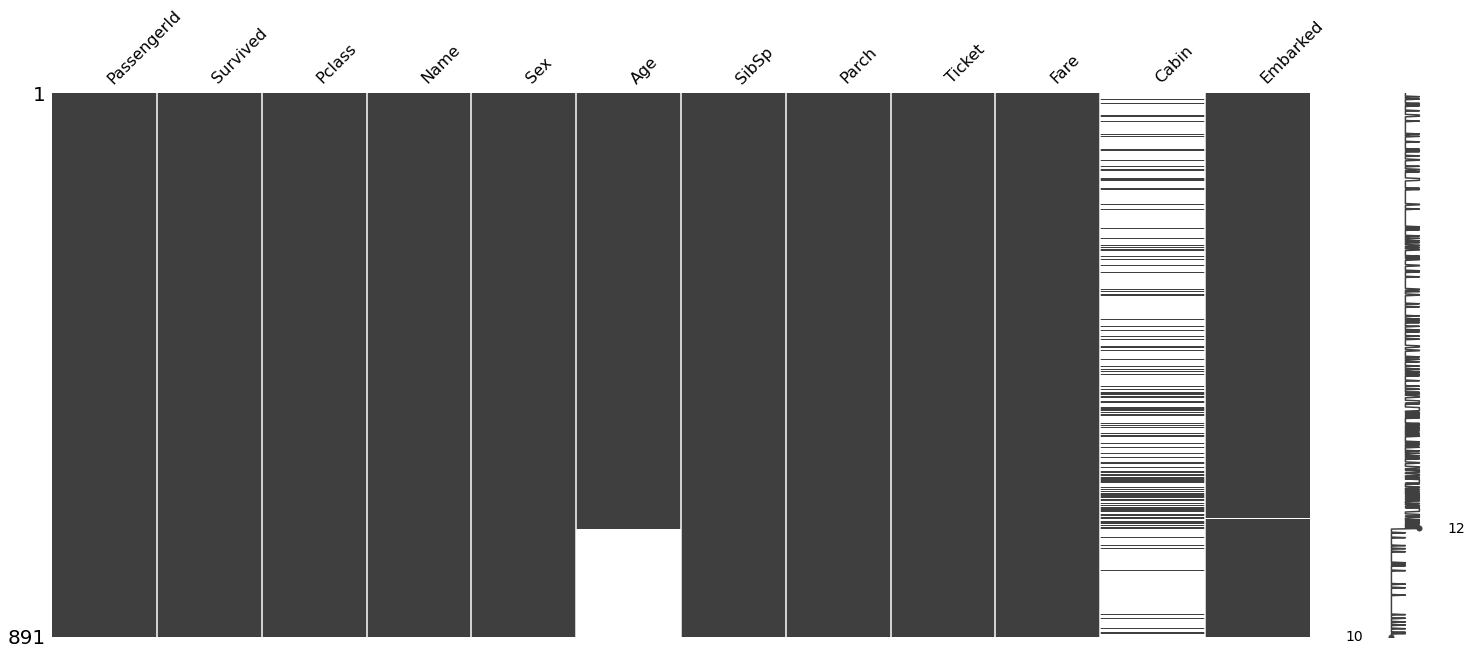

In [73]:
#Sorted by age
sorted=train.sort_values('Age')
msno.matrix(sorted)

<AxesSubplot: >

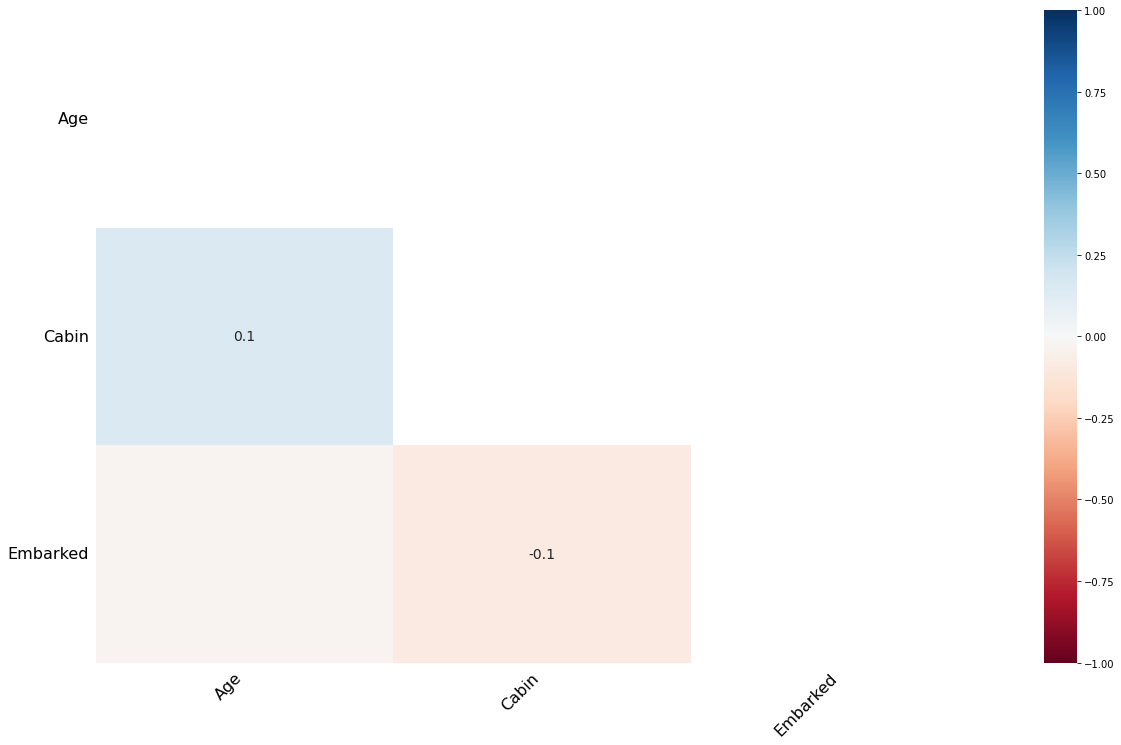

In [74]:
msno.heatmap(train)

<AxesSubplot: >

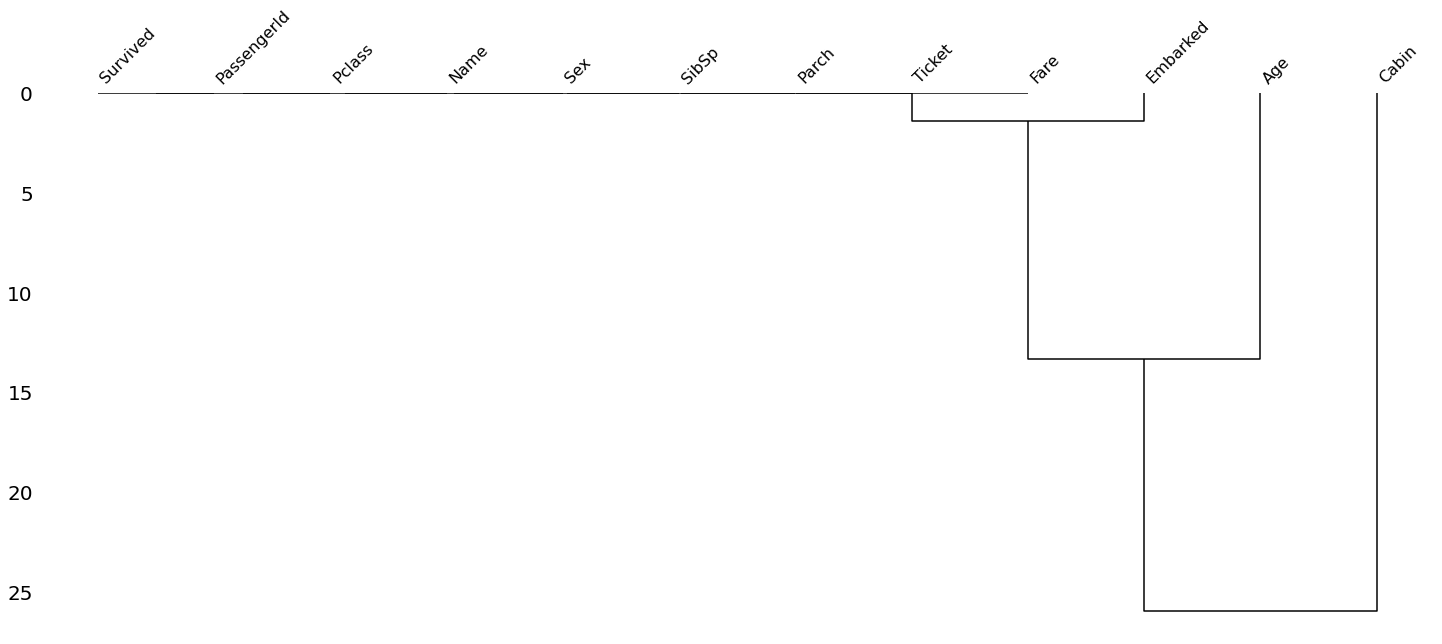

In [75]:
msno.dendrogram(train)

# Treat missing values (deletions,imputing for non time series data,imputing for (time series data)


In [76]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [77]:
train_1=train.copy()
train_1['Age'].mean()

29.69911764705882

In [78]:
train_1.dropna(subset=['Age'],how='any',inplace=True)
train_1['Age'].isnull().sum()

0

In [79]:
from sklearn.impute import SimpleImputer
train_most_frequent=train.copy()
mean_imputer=SimpleImputer(strategy='most_frequent')
train_most_frequent.iloc[:,:]=mean_imputer.fit_transform(train_most_frequent)
train_most_frequent.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [80]:
city_day=pd.read_csv("city_day.csv")
city_day1=city_day.copy(deep=True)
city_day1.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [81]:
city_day_missing=missing_values_table(city_day)
city_day_missing

NameError: name 'mis_val_table_ren_cloumns' is not defined

In [ ]:
#Imputing xylene value
city_day['Xylene'][50:64]

In [ ]:
#Imputing by ffill
city_day.fillna(method='fiilna',inplace=True)
city_day['Xylene'][50:65]

In [ ]:
#Imputing using bfill
city_day['AQI'][20:30]

In [ ]:
city_day.fillna(method='bfill',inplace=True)
city_day['AQI'][20:30]